In [2]:
import math

import gym
import pickle
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

# MountainCar Problem
## Monte-Carlo

In [ ]:
class MonteCarlo:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        state_adj = (state - self.env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        return state_adj

    def run(self, verbose=True):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0
            episode = []

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                # Discretize next_state
                next_state_adj = self._get_discretized_state(next_state)
                episode.append((state_adj, action, reward))

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            states, actions, rewards = zip(*episode)

            # Discounting
            discounts = np.array([self.discount**j for j in range(len(rewards)+1)])

            for j, state in enumerate(states):
                self.Q[state[0], state[1], actions[j]] += self.lr*(sum(rewards[j:]*discounts[:-(1+j)]) - self.Q[state[0], state[1], actions[j]])

            self.epsilon = max(self.epsilon*0.99, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []
for i in tqdm(range(10)):
    env = gym.make('MountainCar-v0')
    env.reset()

    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    # env, num_states, num_episodes, epsilon, lr, discount
    # rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)
    # Run Q-learning algorithm
    monte_carlo = MonteCarlo(env, num_states, num_episodes = 20000, epsilon = 0.8, lr = 0.02, discount = 0.9, min_eps = 0.0)
    monte_carlo.run()
    rewards.append(monte_carlo.avg_reward_list)

  0%|          | 0/10 [00:00<?, ?it/s]

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

 10%|█         | 1/10 [05:42<51:18, 342.05s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 20%|██        | 2/10 [11:22<45:27, 340.91s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 30%|███       | 3/10 [17:01<39:42, 340.31s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 40%|████      | 4/10 [22:42<34:03, 340.52s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 50%|█████     | 5/10 [28:24<28:24, 340.96s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 60%|██████    | 6/10 [34:04<22:43, 340.84s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 70%|███████   | 7/10 [39:44<17:00, 340.30s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 80%|████████  | 8/10 [45:23<11:19, 339.98s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


 90%|█████████ | 9/10 [51:03<05:40, 340.01s/it]

Episode 20000 Average Reward: -200.0
Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0


100%|██████████| 10/10 [56:43<00:00, 340.34s/it]

Episode 20000 Average Reward: -200.0


(10, 200)


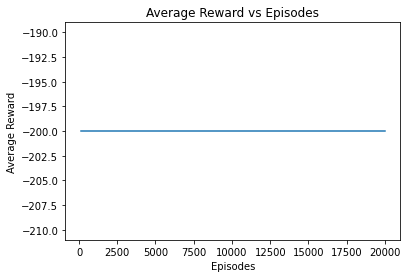

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), np.round(rewards.mean(axis=0), 0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('Mountaincar_montecarlo.png')
plt.show()

In [ ]:
pickle.dump(rewards, open('Mountaincar_montecarlo.sav', 'wb'))


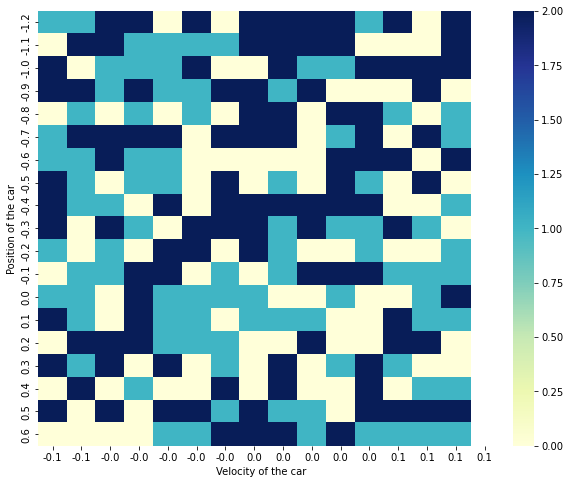

In [ ]:
plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(monte_carlo.Q, axis=-1), cmap="YlGnBu", yticklabels=np.round(np.arange(-1.2, 0.7, 0.1), 1), xticklabels=np.round(np.arange(-0.07, 0.08, 0.01), 1))
plt.ylabel('Position of the car', fontsize=10)
plt.xlabel('Velocity of the car', fontsize=10)
plt.savefig('Mountaincar_montecarlo_policy.png')

## SARSA

In [ ]:
class SARSA:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        state_adj = (state - self.env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        return state_adj

    def run(self, verbose=False):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:        
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                next_state_adj = self._get_discretized_state(next_state)

                next_action = self._get_next_action(next_state_adj)

                # Terminal states
                if is_episode_completed and next_state[0] >= 0.5:
                    self.Q[state_adj[0], state_adj[1], action] = reward
                
                # Update current estimates
                else:
                    delta = self.lr*(reward + 
                        self.discount*self.Q[next_state_adj[0], next_state_adj[1], next_action] - 
                        self.Q[state_adj[0], state_adj[1], action]
                    )
                    self.Q[state_adj[0], state_adj[1],action] += delta

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            self.epsilon = max(self.epsilon*0.99, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []

for i in tqdm(range(10)):
    env = gym.make('MountainCar-v0')
    env.reset()

    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    sarsa = SARSA(env, num_states, num_episodes = 20000, epsilon = 0.8, lr = 0.02, discount = 0.9, min_eps = 0)
    sarsa.run()
    rewards.append(sarsa.avg_reward_list)

100%|██████████| 10/10 [37:08<00:00, 222.84s/it]


(10, 200)


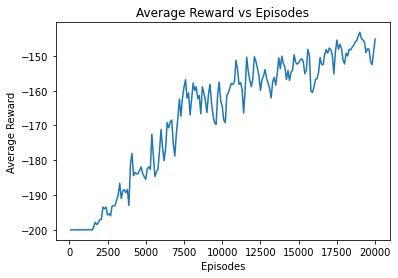

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), rewards.mean(axis=0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('Mountaincar_sarsa.png')
plt.show()

In [ ]:
pickle.dump(rewards, open('Mountaincar_sarsa.sav', 'wb'))

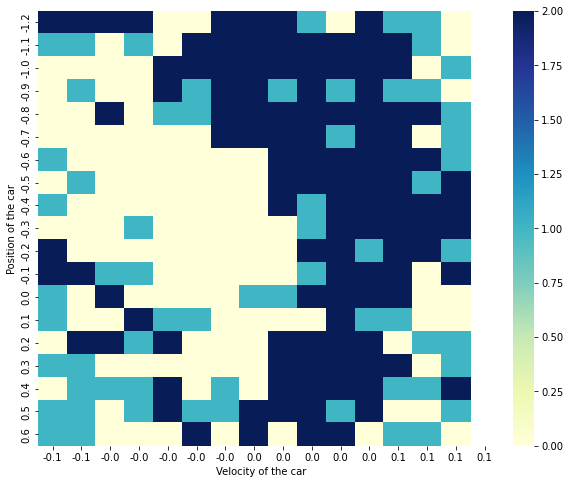

In [ ]:
plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(sarsa.Q, axis=-1), cmap="YlGnBu", yticklabels=np.round(np.arange(-1.2, 0.7, 0.1), 1), xticklabels=np.round(np.arange(-0.07, 0.08, 0.01), 1))
plt.ylabel('Position of the car', fontsize=10)
plt.xlabel('Velocity of the car', fontsize=10)
plt.savefig('Mountaincar_sarsa_policy.png')

## Q-Learning

In [ ]:
class QLearning:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        state_adj = (state - self.env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        return state_adj

    def run(self, verbose=False):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:              
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                next_state_adj = self._get_discretized_state(next_state)

                # Terminal states
                if is_episode_completed and next_state[0] >= 0.5:
                    self.Q[state_adj[0], state_adj[1], action] = reward
                
                # Update current estimates
                else:
                    delta = self.lr*(reward + 
                        self.discount*np.max(self.Q[next_state_adj[0], next_state_adj[1]]) - 
                        self.Q[state_adj[0], state_adj[1], action]
                    )
                    self.Q[state_adj[0], state_adj[1],action] += delta

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            self.epsilon = max(self.epsilon*0.99, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []
for i in tqdm(range(10)):
    env = gym.make('MountainCar-v0')
    env.reset()

    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    q_learning = QLearning(env, num_states, num_episodes = 20000, epsilon = 0.8, lr = 0.02, discount = 0.9, min_eps = 0.0)
    q_learning.run()
    rewards.append(q_learning.avg_reward_list)

100%|██████████| 10/10 [41:57<00:00, 251.77s/it]


(10, 200)


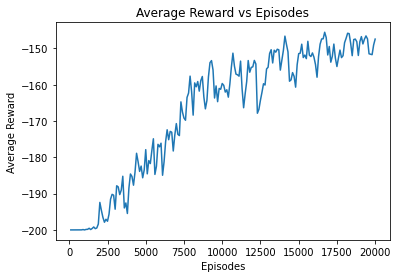

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), rewards.mean(axis=0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('Mountaincar_qlearn.png')
plt.show()

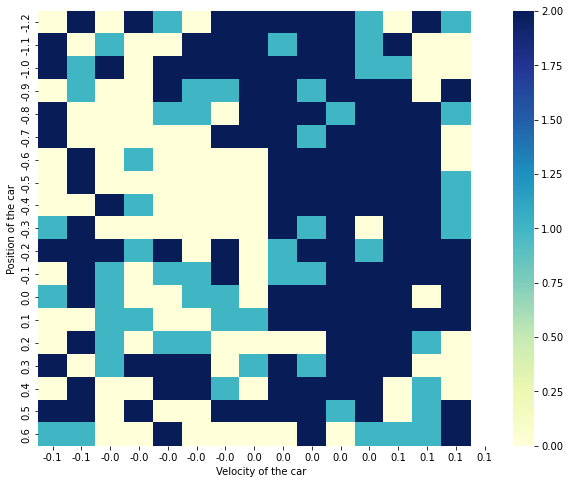

In [ ]:
plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(q_learning.Q, axis=-1), cmap="YlGnBu", yticklabels=np.round(np.arange(-1.2, 0.7, 0.1), 1), xticklabels=np.round(np.arange(-0.07, 0.08, 0.01), 1))
plt.ylabel('Position of the car', fontsize=10)
plt.xlabel('Velocity of the car', fontsize=10)
plt.savefig('Mountaincar_qlearn_policy.png')
plt.close()

In [ ]:
pickle.dump(rewards, open('Mountaincar_qlearn.sav', 'wb'))

# CartPole
## Monte Carlo

In [ ]:
class MonteCarlo:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        discrete_state = np.array([0,0])

        theta_window =  ( self.env.observation_space.high[2] - (-self.env.observation_space.high[2]) ) / 50
        discrete_state[0] = ( state[2] - (-self.env.observation_space.high[2]) ) // theta_window
        discrete_state[0] = min(50-1, max(0,discrete_state[0]))

        theta_dot_window =  ( math.radians(50) - (-math.radians(50)) )/ 50
        discrete_state[1] = ( state[3] - (-math.radians(50)) ) // theta_dot_window
        discrete_state[1] = min(50-1, max(0,discrete_state[1]))

        return discrete_state.astype(np.int)

    def run(self, verbose=False):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0
            episode = []

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                # Discretize next_state
                next_state_adj = self._get_discretized_state(next_state)
                episode.append((state_adj, action, reward))

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            states, actions, rewards = zip(*episode)

            # Discounting
            discounts = np.array([self.discount**j for j in range(len(rewards)+1)])

            for j, state in enumerate(states):
                self.Q[state[0], state[1], actions[j]] += self.lr*(sum(rewards[j:]*discounts[:-(1+j)]) - self.Q[state[0], state[1], actions[j]])

            self.epsilon = max(self.epsilon*0.9999, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []
for i in tqdm(range(10)):
    env = gym.make('CartPole-v0')
    env.reset()

    monte_carlo = MonteCarlo(env, (50, 50), num_episodes = 20000, epsilon = 0.8, lr = 0.2, discount = 0.9, min_eps = 0)
    monte_carlo.run()
    rewards.append(monte_carlo.avg_reward_list)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 10/10 [18:56<00:00, 113.70s/it]


(10, 200)


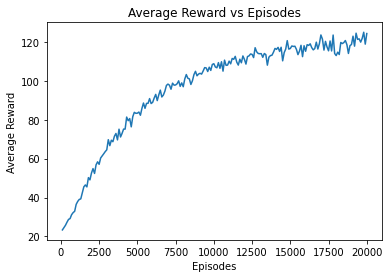

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), rewards.mean(axis=0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('CartPole_montecarlo.png')
plt.show()

In [ ]:
pickle.dump(rewards, open('Cartpole_montecarlo.sav', 'wb'))


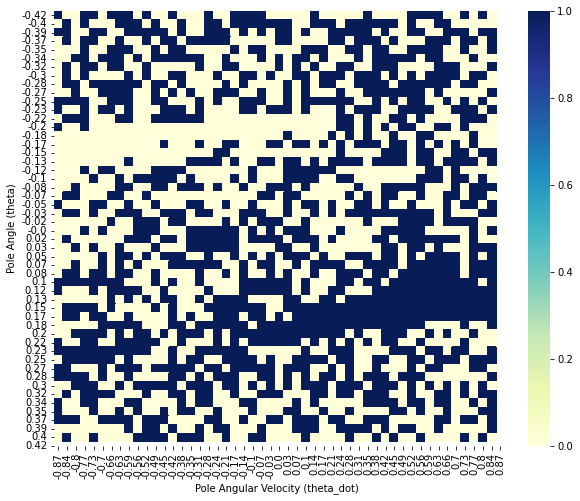

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(monte_carlo.Q, axis=-1), 
                  cmap="YlGnBu", 
                  yticklabels=np.round(
                      np.arange(env.observation_space.low[2], 
                                env.observation_space.high[2]+ ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50, 
                                 ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50), 2), 
                  xticklabels=np.round(
                      np.arange(-math.radians(50), 
                                math.radians(50) + ( math.radians(50) - (-math.radians(50)) )/ 50, 
                                ( math.radians(50) - (-math.radians(50)) )/ 50), 2))
plt.ylabel('Pole Angle (theta)', fontsize=10)
plt.xlabel('Pole Angular Velocity (theta_dot)', fontsize=10)
plt.savefig('CartPole_montecarlo_policy.png')

## SARSA

In [ ]:
class SARSA:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        discrete_state = np.array([0,0])		

        theta_window =  ( self.env.observation_space.high[2] - (-self.env.observation_space.high[2]) ) / 50
        discrete_state[0] = ( state[2] - (-self.env.observation_space.high[2]) ) // theta_window
        discrete_state[0] = min(50-1, max(0,discrete_state[0]))

        theta_dot_window =  ( math.radians(50) - (-math.radians(50)) )/ 50
        discrete_state[1] = ( state[3] - (-math.radians(50)) ) // theta_dot_window
        discrete_state[1] = min(50-1, max(0,discrete_state[1]))

        return discrete_state.astype(np.int)

    def run(self, verbose=False):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:
 
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                next_state_adj = self._get_discretized_state(next_state)

                next_action = self._get_next_action(next_state_adj)

                # Terminal states
                if is_episode_completed and next_state[0] >= 0.5:
                    self.Q[state_adj[0], state_adj[1], action] = reward
                
                # Update current estimates
                else:
                    delta = self.lr*(reward + 
                        self.discount*self.Q[next_state_adj[0], next_state_adj[1], next_action] - 
                        self.Q[state_adj[0], state_adj[1], action]
                    )
                    self.Q[state_adj[0], state_adj[1],action] += delta

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            self.epsilon = max(self.epsilon*0.9999, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []

for i in tqdm(range(10)):
    env = gym.make('CartPole-v0')
    env.reset()

    sarsa = SARSA(env, (50, 50), num_episodes = 20000, epsilon = 0.8, lr = 0.2, discount = 0.9, min_eps = 0.0)
    sarsa.run()
    rewards.append(sarsa.avg_reward_list)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 10/10 [12:37<00:00, 75.76s/it]


(10, 200)


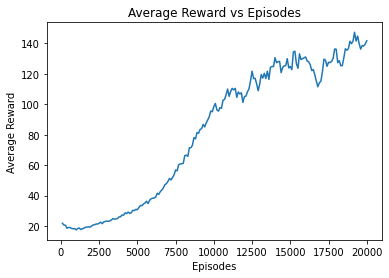

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), rewards.mean(axis=0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('CartPole_sarsa.png')
plt.show()

In [ ]:
pickle.dump(rewards, open('Cartpole_sarsa.sav', 'wb'))


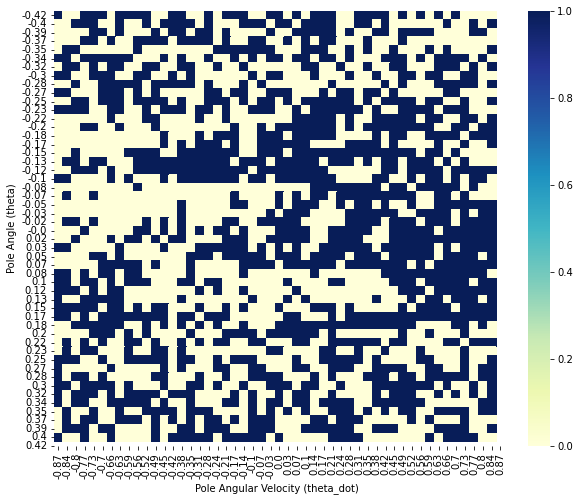

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(sarsa.Q, axis=-1), 
                  cmap="YlGnBu", 
                  yticklabels=np.round(
                      np.arange(env.observation_space.low[2], 
                                env.observation_space.high[2]+ ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50, 
                                 ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50), 2), 
                  xticklabels=np.round(
                      np.arange(-math.radians(50), 
                                math.radians(50) + ( math.radians(50) - (-math.radians(50)) )/ 50, 
                                ( math.radians(50) - (-math.radians(50)) )/ 50), 2))
plt.ylabel('Pole Angle (theta)', fontsize=10)
plt.xlabel('Pole Angular Velocity (theta_dot)', fontsize=10)
plt.savefig('CartPole_sarsa_policy.png')

## Q-Learning

In [ ]:
class QLearning:
    def __init__(self, env, num_states, num_episodes, epsilon, lr, discount, min_eps):
        self.env = env
        self.num_states = num_states
        self.num_episodes = num_episodes
        self.epsilon = epsilon
        self.lr = lr
        self.discount = discount
        self.min_eps = min_eps

    def _init_variables(self):
        self.Q = np.random.uniform(low = -1, high = 1, 
                size = (self.num_states[0], self.num_states[1], 
                self.env.action_space.n))
        self.reward_list = []
        self.avg_reward_list = []

    def _get_next_action(self, state_adj):
        if np.random.random() < 1 - self.epsilon:
            action = np.argmax(self.Q[state_adj[0], state_adj[1]]) 
        else:
            action = np.random.randint(0, self.env.action_space.n)
        
        return action

    def _get_discretized_state(self, state):
        discrete_state = np.array([0,0])

        theta_window =  ( self.env.observation_space.high[2] - (-self.env.observation_space.high[2]) ) / 50
        discrete_state[0] = ( state[2] - (-self.env.observation_space.high[2]) ) // theta_window
        discrete_state[0] = min(50-1, max(0,discrete_state[0]))

        theta_dot_window =  ( math.radians(50) - (-math.radians(50)) )/ 50
        discrete_state[1] = ( state[3] - (-math.radians(50)) ) // theta_dot_window
        discrete_state[1] = min(50-1, max(0,discrete_state[1]))

        return discrete_state.astype(np.int)

    def run(self, verbose=False):
        self._init_variables()

        reduction = (self.epsilon - self.min_eps)/self.num_episodes

        for i in range(self.num_episodes):
            state = self.env.reset()
            is_episode_completed = False
            total_reward = 0
            reward = 0

            state_adj = self._get_discretized_state(state)

            while is_episode_completed != True:               
                action = self._get_next_action(state_adj)

                next_state, reward, is_episode_completed, _ = self.env.step(action)

                next_state_adj = self._get_discretized_state(next_state)

                # Terminal states
                if is_episode_completed and next_state[0] >= 0.5:
                    self.Q[state_adj[0], state_adj[1], action] = reward
                
                # Update current estimates
                else:
                    delta = self.lr*(reward + 
                        self.discount*np.max(self.Q[next_state_adj[0], next_state_adj[1]]) - 
                        self.Q[state_adj[0], state_adj[1], action]
                    )
                    self.Q[state_adj[0], state_adj[1],action] += delta

                # Update variables
                total_reward += reward
                state_adj = next_state_adj

            self.epsilon = max(self.epsilon*0.9999, self.min_eps)

            self.reward_list.append(total_reward)

            if (i+1) % 100 == 0:
                avg_reward = np.mean(self.reward_list)
                self.avg_reward_list.append(avg_reward)
                self.reward_list = []
            
            if (i+1) % 100 == 0 and verbose:    
                print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
        self.env.close()

In [ ]:
rewards = []
for i in tqdm(range(10)):
    env = gym.make('CartPole-v0')
    env.reset()

    q_learning = QLearning(env, (50, 50), num_episodes = 20000, epsilon = 0.8, lr = 0.2, discount = 0.9, min_eps = 0)
    q_learning.run()
    rewards.append(q_learning.avg_reward_list)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 10/10 [17:21<00:00, 104.12s/it]


(10, 200)


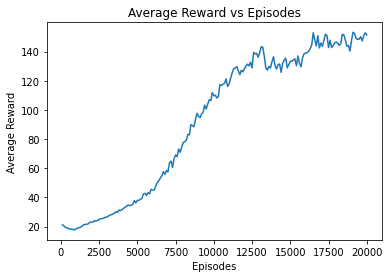

In [ ]:
rewards = np.array(rewards)
print(rewards.shape)
plt.plot(100*(np.arange(len(rewards[0])) + 1), rewards.mean(axis=0))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('CartPole_qlearn.png')
plt.show()

In [ ]:
pickle.dump(rewards, open('Cartpole_qlearn.sav', 'wb'))


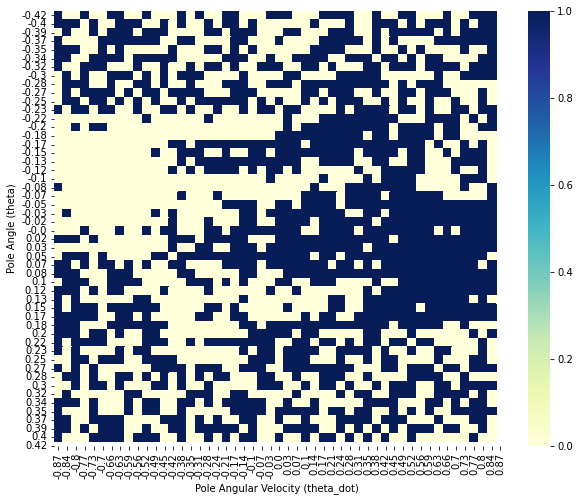

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

plt.figure(figsize=(10, 8))
fig = sns.heatmap(np.argmax(q_learning.Q, axis=-1), 
                  cmap="YlGnBu", 
                  yticklabels=np.round(
                      np.arange(env.observation_space.low[2], 
                                env.observation_space.high[2]+ ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50, 
                                 ( env.observation_space.high[2] - (-env.observation_space.high[2]) ) / 50), 2), 
                  xticklabels=np.round(
                      np.arange(-math.radians(50), 
                                math.radians(50) + ( math.radians(50) - (-math.radians(50)) )/ 50, 
                                ( math.radians(50) - (-math.radians(50)) )/ 50), 2))
plt.ylabel('Pole Angle (theta)', fontsize=10)
plt.xlabel('Pole Angular Velocity (theta_dot)', fontsize=10)
plt.savefig('CartPole_qlearn_policy.png')